# Race Story

Setup

In [117]:
import fastf1
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from fastf1 import plotting
from matplotlib import pyplot as plt

from statsmodels.nonparametric.smoothers_lowess import lowess

plotting.setup_mpl()

## Fastest lap at qualifying

In [118]:
quali = fastf1.get_session(2022, "Hungarian Grand Prix", "Q")
quali.load()
laps_df = quali.laps.copy()
laps_df

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:17:24.623000,63,NaT,1,0 days 00:15:36.540000,NaT,NaT,0 days 00:00:35.631000,0 days 00:00:37.293000,NaT,...,SOFT,1.0,True,1,0 days 00:15:36.540000,Mercedes,RUS,1,False,2022-07-30 14:01:02.280
1,0 days 00:18:44.440000,63,0 days 00:01:19.817000,2,NaT,NaT,0 days 00:00:28.748000,0 days 00:00:28.857000,0 days 00:00:22.212000,0 days 00:17:53.371000,...,SOFT,2.0,True,1,0 days 00:17:24.623000,Mercedes,RUS,1,True,2022-07-30 14:02:50.363
2,0 days 00:20:47.265000,63,0 days 00:02:02.825000,3,NaT,NaT,0 days 00:00:38.235000,0 days 00:00:46.947000,0 days 00:00:37.643000,0 days 00:19:22.675000,...,SOFT,3.0,True,1,0 days 00:18:44.440000,Mercedes,RUS,1,True,2022-07-30 14:04:10.180
3,0 days 00:22:06.441000,63,0 days 00:01:19.176000,4,NaT,NaT,0 days 00:00:28.634000,0 days 00:00:28.338000,0 days 00:00:22.204000,0 days 00:21:15.899000,...,SOFT,4.0,True,1,0 days 00:20:47.265000,Mercedes,RUS,1,True,2022-07-30 14:06:13.005
4,0 days 00:24:11.861000,63,0 days 00:02:05.420000,5,NaT,NaT,0 days 00:00:43.221000,0 days 00:00:48.090000,0 days 00:00:34.109000,0 days 00:22:49.662000,...,SOFT,5.0,True,1,0 days 00:22:06.441000,Mercedes,RUS,1,True,2022-07-30 14:07:32.181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0 days 00:28:25.789000,6,NaT,6,0 days 00:26:45.681000,NaT,NaT,0 days 00:00:32.824000,0 days 00:00:32.908000,NaT,...,SOFT,1.0,True,2,0 days 00:23:45.313000,Williams,LAT,1,False,2022-07-30 14:09:11.053
330,0 days 00:29:45.359000,6,0 days 00:01:19.570000,7,NaT,NaT,0 days 00:00:28.540000,0 days 00:00:28.585000,0 days 00:00:22.445000,0 days 00:28:54.329000,...,SOFT,2.0,True,2,0 days 00:28:25.789000,Williams,LAT,1,True,2022-07-30 14:13:51.529
331,0 days 00:31:48.776000,6,0 days 00:02:03.417000,8,NaT,NaT,0 days 00:00:43.157000,0 days 00:00:45.141000,0 days 00:00:35.119000,0 days 00:30:28.516000,...,SOFT,3.0,True,2,0 days 00:29:45.359000,Williams,LAT,1,True,2022-07-30 14:15:11.099
332,0 days 00:33:08.731000,6,0 days 00:01:19.955000,9,NaT,NaT,0 days 00:00:28.185000,0 days 00:00:28.511000,0 days 00:00:23.259000,0 days 00:32:16.961000,...,SOFT,4.0,True,2,0 days 00:31:48.776000,Williams,LAT,1,True,2022-07-30 14:17:14.516


## Plotting racing story

Load data

In [135]:
race = fastf1.get_session(2022, "Hungarian Grand Prix", "R")
race.load()
laps_df = race.laps.copy()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/opt/homebrew/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=

Plot

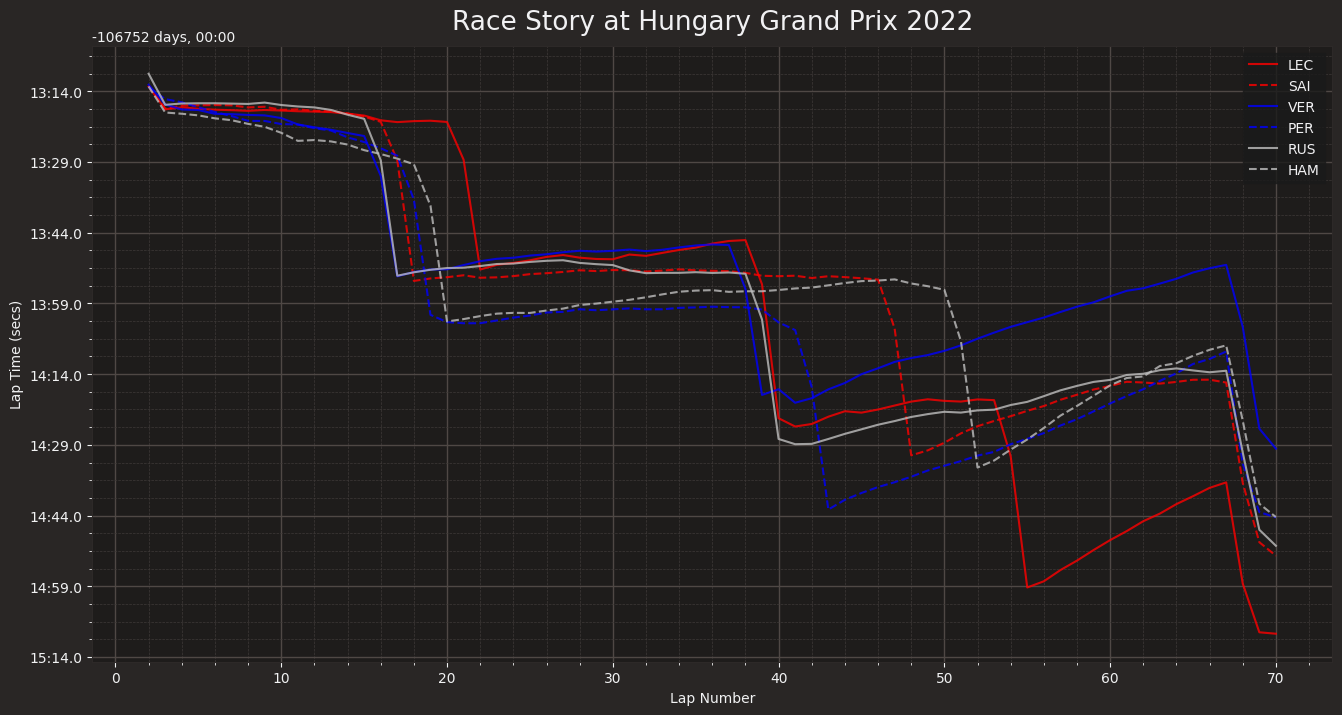

In [220]:
fastest_lap = race.laps["LapTime"].min()
threshold = fastest_lap * 1.07

# ferrari
lec = race.laps.pick_driver("LEC")
sai = race.laps.pick_driver("SAI")

# red bull
ver = race.laps.pick_driver("VER")
per = race.laps.pick_driver("PER")

# mercedes
ham = race.laps.pick_driver("HAM")
rus = race.laps.pick_driver("RUS")


def smooth_cumulative_delta(df: pd.DataFrame) -> pd.DataFrame:
    # df[df["LapTime"] > threshold] = np.nan
    # df = df.fillna(method="bfill").fillna(method="ffill")
    delta = (
        df["LapTime"] 
        + df["PitOutTime"].fillna(pd.to_timedelta(0, unit="ms")) / 1000
        + df["PitInTime"].fillna(pd.to_timedelta(0, unit="ms")) / 1000
        - pd.to_timedelta(84, unit="S")
    )
    #window = delta.rolling(window=4)
    #high, low = window.mean() + 3 * window.std(), window.mean() - 3 * window.std()
    #delta[~delta.between(low, high)] = np.nan
    #delta = delta.fillna(method="bfill")
    return delta.cumsum()


lec_delta_cumsum = smooth_cumulative_delta(lec)
sai_delta_cumsum = smooth_cumulative_delta(sai)
ver_delta_cumsum = smooth_cumulative_delta(ver)
per_delta_cumsum = smooth_cumulative_delta(per)
ham_delta_cumsum = smooth_cumulative_delta(ham)
rus_delta_cumsum = smooth_cumulative_delta(rus)


fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(lec["LapNumber"], lec_delta_cumsum, color="red", label="LEC", alpha=0.8)
ax.plot(ver["LapNumber"], sai_delta_cumsum, color="red", label="SAI", linestyle="--", alpha=0.8)
ax.plot(sai["LapNumber"], ver_delta_cumsum, color="blue", label="VER", alpha=0.8)
ax.plot(per["LapNumber"], per_delta_cumsum, color="blue", label="PER", linestyle="--", alpha=0.8)
ax.plot(sai["LapNumber"], rus_delta_cumsum, color="silver", label="RUS", alpha=0.8)
ax.plot(per["LapNumber"], ham_delta_cumsum, color="silver", label="HAM", linestyle="--", alpha=0.8)
ax.set_title("Race Story at Hungary Grand Prix 2022")
ax.set_ylabel("Lap Time (secs)")
ax.set_xlabel("Lap Number")
ax.invert_yaxis()
ax.legend()